In [719]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
from scipy import optimize
from sklearn import linear_model
from sklearn.metrics import r2_score
import requests

In [720]:
url = 'https://covid.ourworldindata.org/data/ecdc/full_data.csv'
resp = requests.get(url)
if resp.status_code==200:
    with open('full_data.csv','wb') as fp:
        fp.write(resp.content)
    


In [721]:
data_covid = pd.read_csv('full_data.csv',parse_dates=True)

In [722]:
latest_day = data_covid.date.values[-1]
print(f'Moste recent day: {latest_day}')

Moste recent day: 2020-03-31


In [723]:
population = pd.read_csv('countries.csv')
n = len(population)
for i in range(n):
    country = population.loc[i,'Country']
    if country.endswith(' '):
        population.loc[i,'Country'] = country[:-1]
population.loc[n,'Country'] = 'World'
population.loc[n,'Population'] = population.Population.sum()
population.loc[n,'Area (sq. mi.)'] = population['Area (sq. mi.)'].sum()

population['Pop. Density (per sq. mi.)']= population['Population']/population['Area (sq. mi.)']

population.tail().T

,223,224,225,226,227
Country,Western Sahara,Yemen,Zambia,Zimbabwe,World
Region,NORTHERN AFRICA,NEAR EAST,SUB-SAHARAN AFRICA,SUB-SAHARAN AFRICA,NaN
Population,273008,2.14562e+07,1.1502e+07,1.22368e+07,6.52404e+09
Area (sq. mi.),266000,527970,752614,390580,1.35798e+08
Pop. Density (per sq. mi.),1.02635,40.639,15.2827,31.3298,48.0424
Coastline (coast/area ratio),0.42,0.36,0,0,NaN
Net migration,0,0,0,0,NaN
Infant mortality (per 1000 births),0,61.5,88.29,67.69,NaN
GDP ($ per capita),0,800,800,1900,NaN
Literacy (%),0,50.2,80.6,90.7,NaN


In [724]:
data=data_covid.merge(population,how = 'left',left_on='location',right_on='Country')
data.drop(columns=['Country'],inplace=True)

In [725]:
data['death_rate']=data['total_deaths']/data['total_cases']
data['death_rate']=data['death_rate'].fillna(0)

data['cases_per_million'] = data['total_cases']/data['Population']*1000000
data['death_per_million'] = data['total_deaths']/data['Population']*1000000


In [726]:
styles = [s for s in plt.style.library.keys()]
style = styles[2]
plt.style.use(style)
print(style)

dark_background


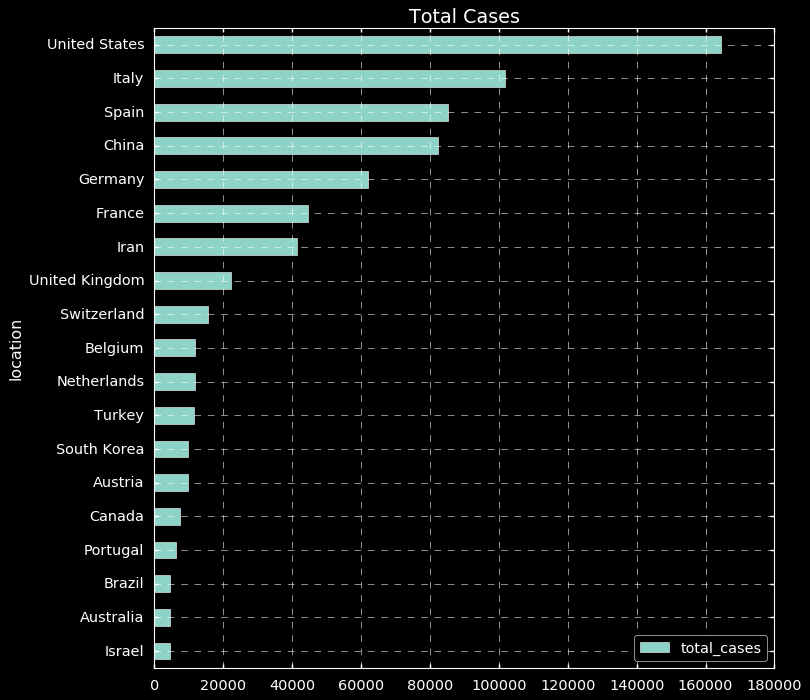

In [727]:
data[data.date == latest_day].sort_values(by = 'total_cases')[-20:-1].plot('location','total_cases',
                                                                           kind = 'barh',
                                                                          figsize = (10,10),
                                                                          grid = True,
                                                                          title = 'Total Cases');


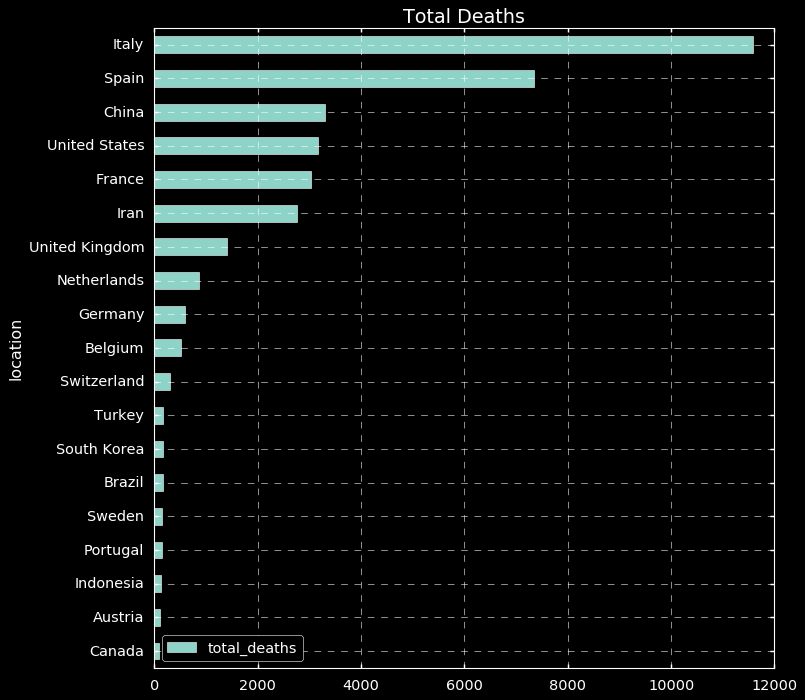

In [728]:
data[data.date == latest_day].sort_values(by = 'total_deaths')[-20:-1].plot('location','total_deaths',
                                                                           kind = 'barh',
                                                                          figsize = (10,10),
                                                                          grid = True,
                                                                          title = 'Total Deaths');


C:\Users\Pooya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


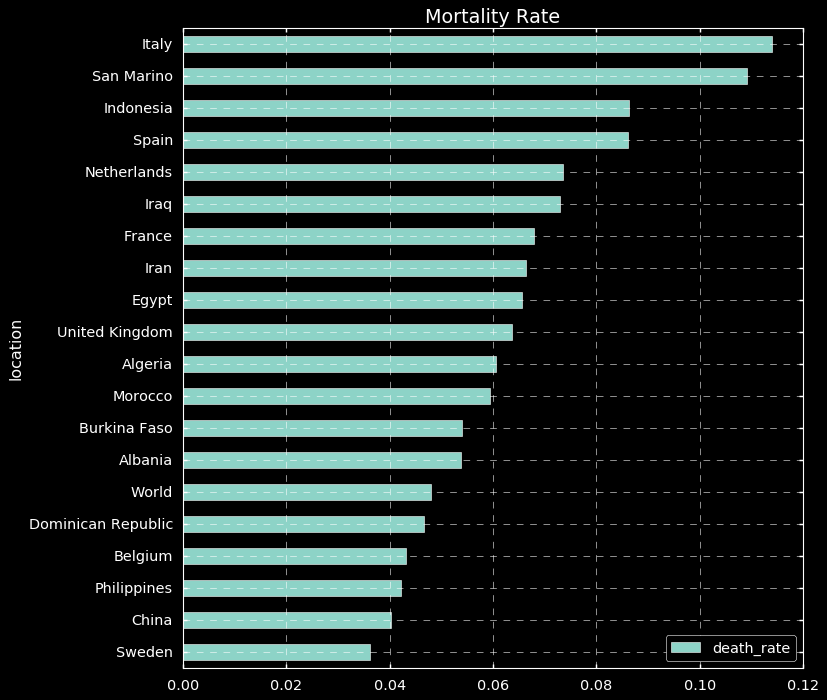

In [729]:
data[data.date == latest_day][data.total_deaths>10].sort_values(by = 'death_rate')[-20:].plot('location','death_rate',
                                                                           kind = 'barh',
                                                                          figsize = (10,10),
                                                                          grid = True,
                                                                          title = 'Mortality Rate');


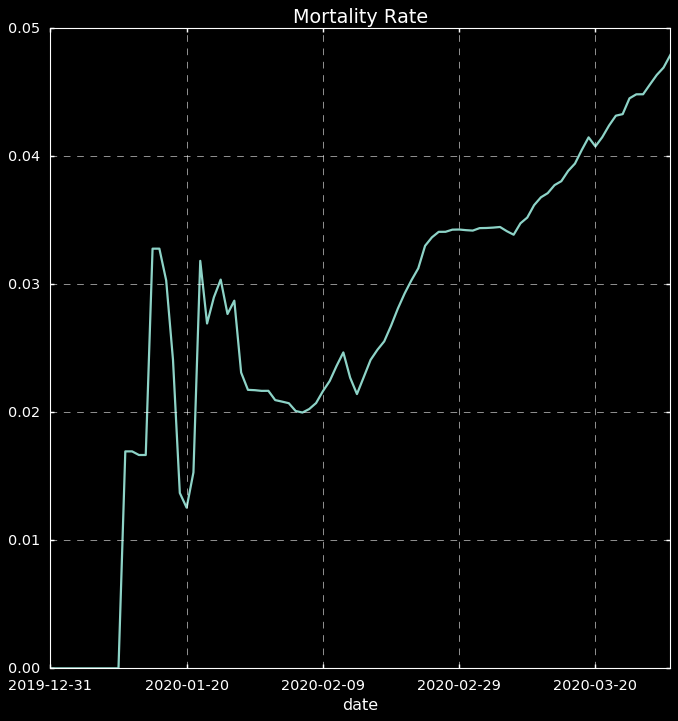

In [767]:
data[data.location == 'World'].plot('date','death_rate',
#                                    kind = 'box',
                                  figsize = (10,10),
                                  grid = True,
                                    legend=None,
                                  title = 'Mortality Rate');


C:\Users\Pooya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


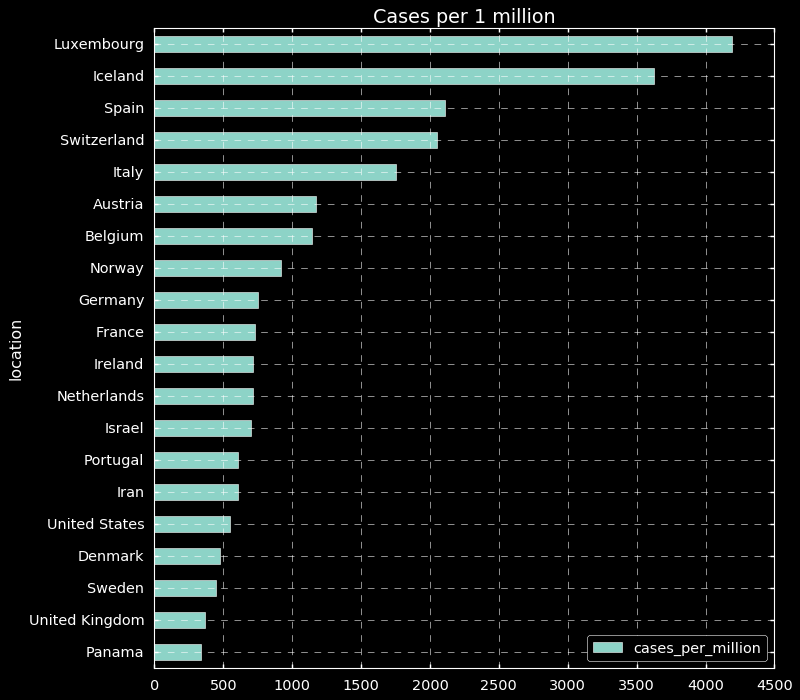

In [730]:
data[data.date == latest_day][data.total_cases>1000].sort_values(by = 'cases_per_million')[-20:].plot('location','cases_per_million',
                                                                                                       kind = 'barh',
                                                                                                      figsize = (10,10),
                                                                                                      grid = True,
                                                                                                      title = 'Cases per 1 million');

C:\Users\Pooya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


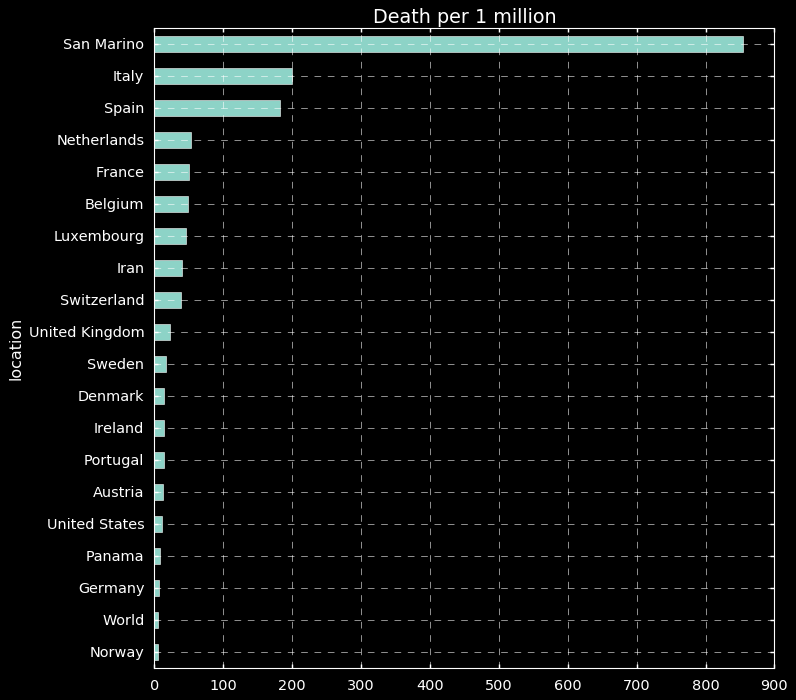

In [731]:
data[data.date == latest_day][data.total_deaths>10].sort_values(by = 'death_per_million')[-20:].plot('location','death_per_million',
                                                                                                     kind = 'barh',
                                                                                                     legend = False,
                                                                                                      figsize = (10,10),
                                                                                                      grid = True,
                                                                                                      title = 'Death per 1 million');
# data.plot()

In [732]:
data_recent = data[data.date == latest_day].copy()

In [733]:
data_recent.columns

Index(['date', 'location', 'new_cases', 'new_deaths', 'total_cases',
       'total_deaths', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service', 'death_rate', 'cases_per_million',
       'death_per_million'],
      dtype='object')

In [734]:
dates = pd.date_range(data.date.values[0],data.date.values[-1])

In [735]:
period = 7

day_start = dates[(-1-period)]
day_start = f'{day_start.year:04.0f}-{day_start.month:02.0f}-{day_start.day:02.0f}'
day_end = latest_day

for ind,country in enumerate(data_recent.location):
    try:
        count_start = data[data.location == country][data.date == day_start].total_cases.values[0]
        count_end = data[data.location == country][data.date == day_end].total_cases.values[0]
        ratio = count_end/count_start
        sgr = np.log(ratio)/period
        
        death_start = data[data.location == country][data.date == day_start].total_deaths.values[0]
        death_end = data[data.location == country][data.date == day_end].total_deaths.values[0]
        ratio = death_end/death_start
        sgr_d = np.log(ratio)/period
    except:
        sgr = np.nan
        sgr_d = np.nan
    data_recent.loc[data_recent.index[ind],'cases_growth'] = sgr
    data_recent.loc[data_recent.index[ind],'deaths_growth'] = sgr_d

C:\Users\Pooya\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\Pooya\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Pooya\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Pooya\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\Pooya\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in longlong_scalars
  app.launch_new_instance()
C:\Users\Pooya\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in longlong_scalars
  a

In [736]:
data_recent['cases_doubling'] = np.log(2)/ data_recent['cases_growth'] 
data_recent['deaths_doubling'] = np.log(2)/ data_recent['deaths_growth'] 

In [737]:
data_recent.columns

Index(['date', 'location', 'new_cases', 'new_deaths', 'total_cases',
       'total_deaths', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service', 'death_rate', 'cases_per_million',
       'death_per_million', 'cases_growth', 'deaths_growth', 'cases_doubling',
       'deaths_doubling'],
      dtype='object')

(0, 10)

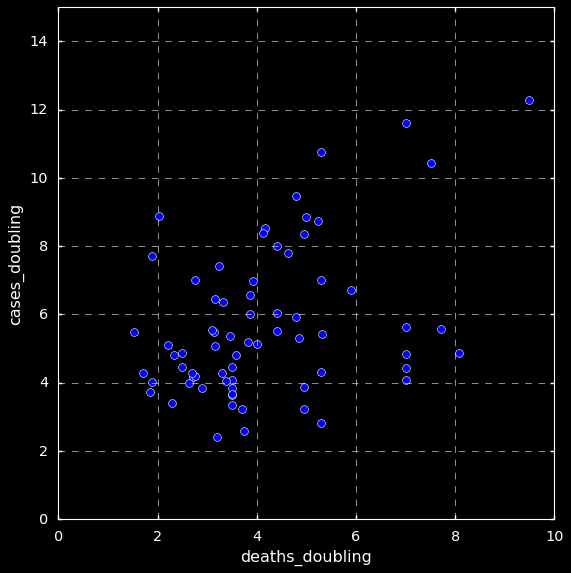

In [738]:
data_recent[data_recent.deaths_doubling>0].plot('deaths_doubling','cases_doubling',
                                              kind='scatter',figsize=(8,8),s = 49)
plt.ylim([0,15])
plt.xlim([0,10])
# plt.scatter(data_recent.cases_growth,
#            data_recent['Pop. Density (per sq. mi.)'].fillna(0))

{'boxes': [<matplotlib.lines.Line2D at 0x3dd33550>],
 'caps': [<matplotlib.lines.Line2D at 0x3dd33f60>,
 'fliers': [<matplotlib.lines.Line2D at 0x3dd39c18>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x3dd397f0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x3dd336a0>,
  <matplotlib.lines.Line2D at 0x3dd33b38>]}

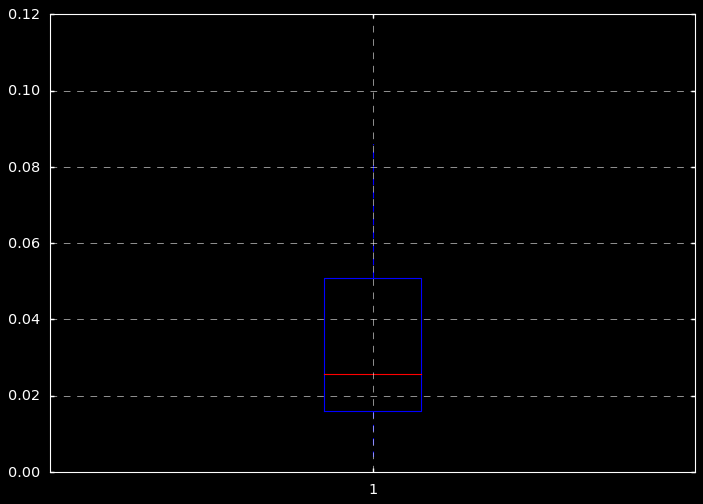

In [764]:
plt.boxplot(data_recent[data_recent.total_deaths>10].death_rate.values)

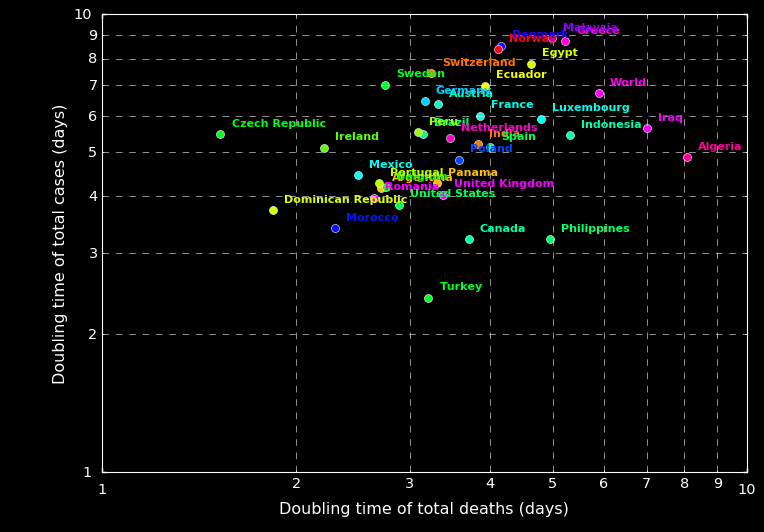

In [739]:
cond_col = 'total_deaths'
y_col = 'cases_doubling'
x_col = 'deaths_doubling'
threshold = 20
n_color = data_recent.index[-1]
cmap = plt.cm.get_cmap('hsv', n_color)
for i in data_recent.index:
    condition = data_recent.loc[i,cond_col]
    x = data_recent.loc[i,x_col]
    y = data_recent.loc[i,y_col]
    if condition>threshold and y>0 and x>0:
        
        country = data_recent.loc[i,'location']
        color = cmap(np.random.randint(n_color))
        plt.scatter([x],[y],s=52,c=color)
#         plt.grid('on')
        plt.annotate(s=country,
                     xy = (x,y), 
                     fontsize = 10,
                     weight='bold',
                     xytext=(10,10),
                     color = color,
                     textcoords='offset points', 
                     va='center')
# plt.xlim([0,2])
# plt.ylim([0,2])
plt.xlabel('Doubling time of total deaths (days)')
plt.ylabel('Doubling time of total cases (days)')
ax = plt.gca()
ax.loglog(True)
ax.set_xbound(1,10);
ax.set_ybound(1,10);
ax.set_xticklabels([0.1, 1,10],minor=False);
ax.set_xticklabels([i for i in range(2,10)]*2,minor=True);
ax.set_yticklabels([0.1, 1,10],minor=False);
ax.set_yticklabels([i for i in range(2,10)]*2,minor=True);
ax.grid('on','minor')

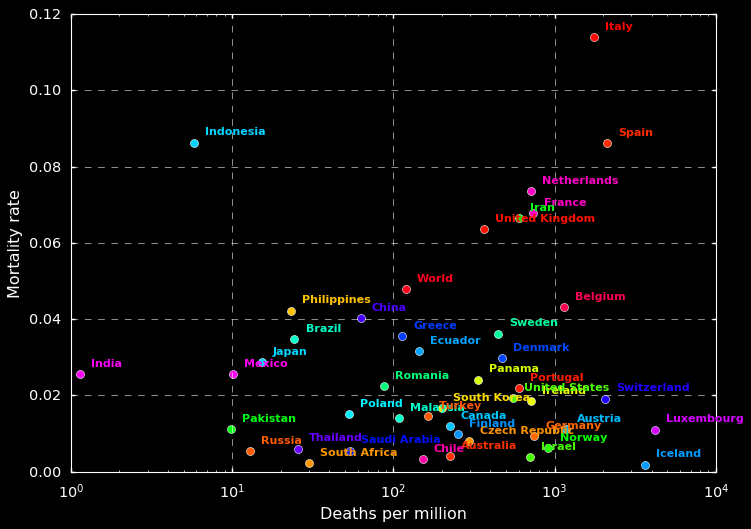

In [787]:
cond_col = 'total_cases'
y_col = 'death_rate'
x_col = 'cases_per_million'
threshold = 1000
n_color = data_recent.index[-1]
cmap = plt.cm.get_cmap('hsv', n_color)
for i in data_recent.index:
    condition = data_recent.loc[i,cond_col]
    x = data_recent.loc[i,x_col]
    y = data_recent.loc[i,y_col]
    if condition>threshold and y>0 and x>0:
        
        country = data_recent.loc[i,'location']
        color = cmap(np.random.randint(n_color))
        plt.scatter([x],[y],s=52,c=color)
#         plt.grid('on')
        plt.annotate(s=country,
                     xy = (x,y), 
                     fontsize = 10,
                     weight='bold',
                     xytext=(10,10),
                     color = color,
                     textcoords='offset points', 
                     va='center')
# plt.xlim([0,2])
# plt.ylim([0,2])
plt.xlabel('Cases per million')
plt.ylabel('Mortality rate')
ax = plt.gca()
ax.semilogx(True)
ax.set_xbound(1,10000);
ax.set_ybound(0,.12);
# ax.set_xticklabels([10**n for n in range(-2,6)],minor=False);
# ax.set_xticklabels([i for i in range(2,10)]*2,minor=True);
# ax.set_yticklabels([0.1, 1,10],minor=False);
# ax.set_yticklabels([i for i in range(2,10)]*2,minor=True);
# ax.grid('on','minor')

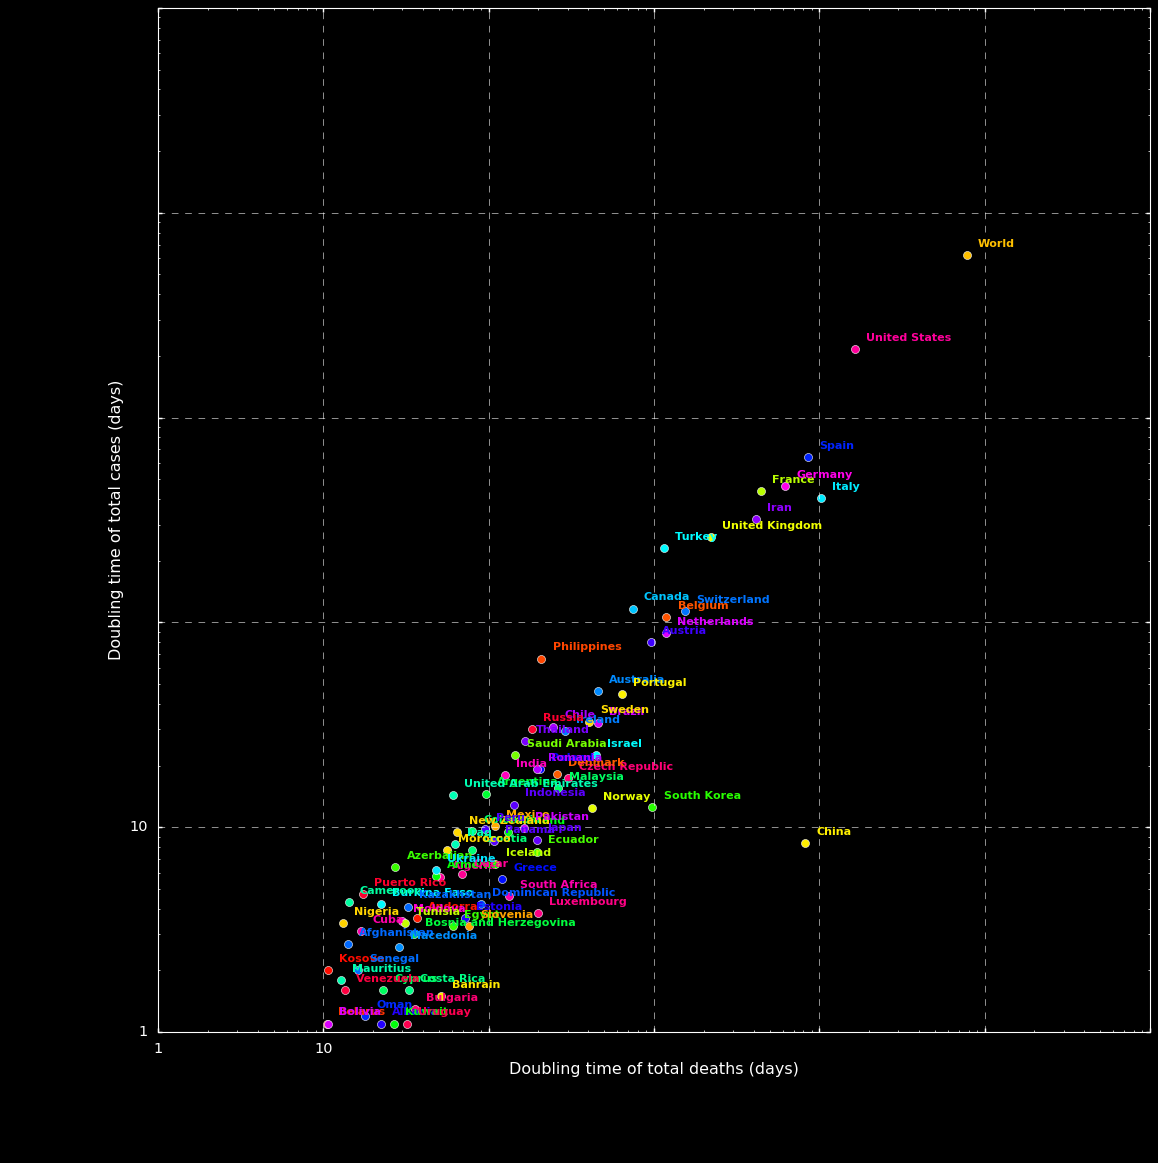

In [740]:
cond_col = 'total_cases'
y_col = 'new_cases'
x_col = 'total_cases'
threshold = 100

plt.figure(figsize=(16,16))
n_color = data_recent.index[-1]
cmap = plt.cm.get_cmap('hsv', n_color)
for i in data_recent.index:
    condition = data_recent.loc[i,cond_col]
    x = data_recent.loc[i,x_col]
    y = data_recent.loc[i,y_col]
    if condition>threshold and y>0 and x>0:
        
        country = data_recent.loc[i,'location']
        color = cmap(np.random.randint(n_color))
        plt.scatter([x],[y],s=52,c=color)
#         plt.grid('on')
        plt.annotate(s=country,
                     xy = (x,y), 
                     fontsize = 10,
                     weight='bold',
                     xytext=(10,10),
                     color = color,
                     textcoords='offset points', 
                     va='center')
# plt.xlim([0,2])
# plt.ylim([0,2])
plt.xlabel('Doubling time of total deaths (days)')
plt.ylabel('Doubling time of total cases (days)')
ax = plt.gca()
ax.loglog(True)
ax.set_xbound(10,None);
ax.set_ybound(10,None);
ax.set_xticklabels([0.1, 1,10],minor=False);
# ax.set_xticklabels([i for i in range(2,10)]*2,minor=True);
ax.set_yticklabels([0.1, 1,10],minor=False);
# ax.set_yticklabels([i for i in range(2,10)]*2,minor=True);
ax.grid('on')


(0, 25000.0)

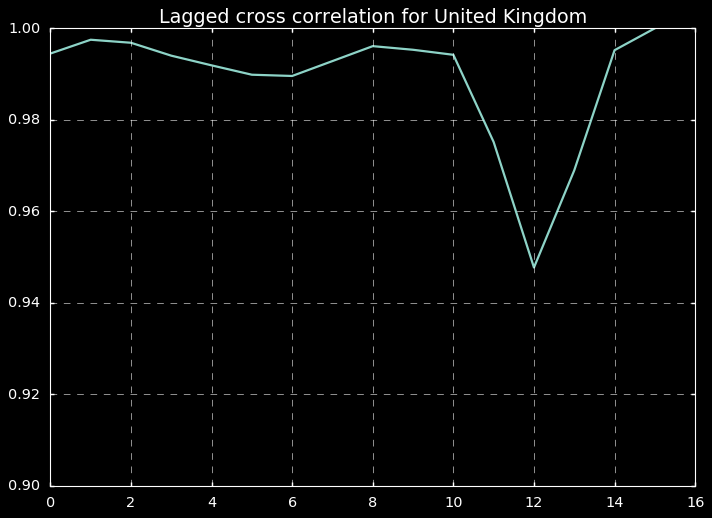

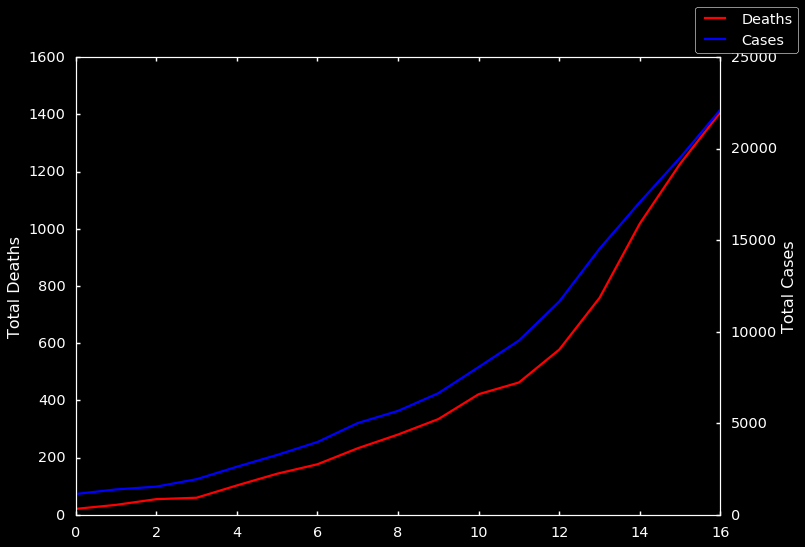

In [854]:
country = 'United Kingdom'
x = data[data.location==country]['total_deaths'].values
y = data[data.location==country]['total_cases'].values

ind = x>10
x=x[ind]
y=y[ind]
# plt.xcorr(x,y,normed=False)

def xcorr(x,y,max_lag=10):
    
    c = [np.corrcoef(x,y)[0][1]]
    max_lag = min(max_lag,len(x)-2)
    for k in range(1,max_lag+1):
        c.append(np.corrcoef(x[k:],y[:-k])[0][1])
    return np.array(c)
fig, ax1 = plt.subplots()
c = xcorr(x,y,30)
ymin , ymax = np.floor(c.min()/.1)*.1, np.ceil(c.max()/.1)*.1
ax1.plot(c)
ax1.set_title(f'Lagged cross correlation for {country}')
ax1.set_ylim((ymin,ymax))
fig, ax2 = plt.subplots()
ax2.plot(x,color='red')
ax2.set_ylabel('Total Deaths')
ax2.grid('off')
ax2.set_ylim((0,None))
ax3 = ax2.twinx()
ax3.plot(y,color = 'blue')
ax3.set_ylabel('Total Cases')
fig.legend(['Deaths','Cases'])
ax3.grid('off')
ax3.set_ylim((0,None))

C:\Users\Pooya\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


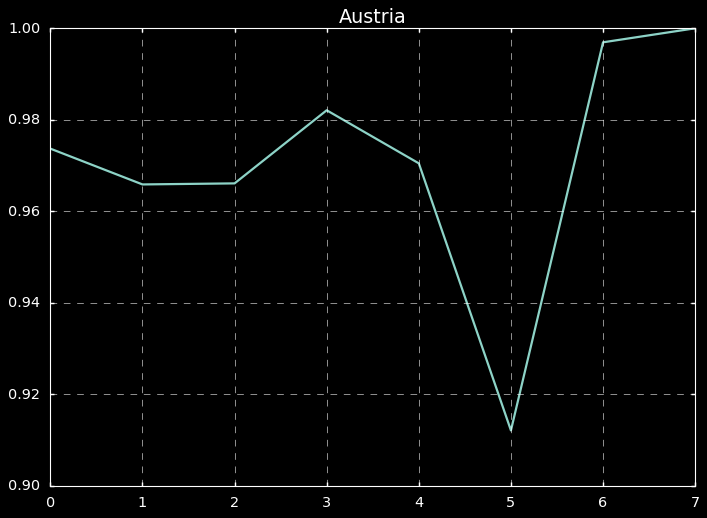

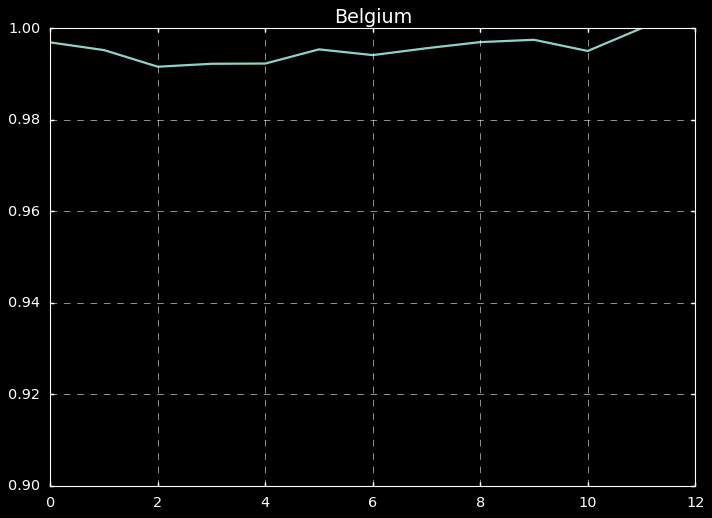

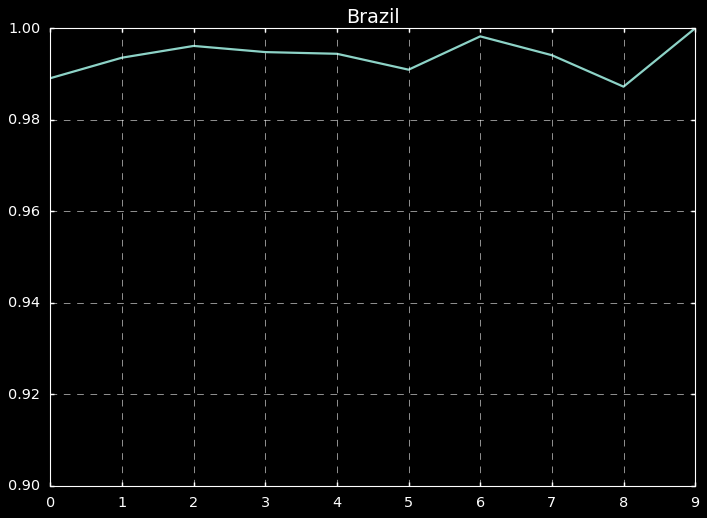

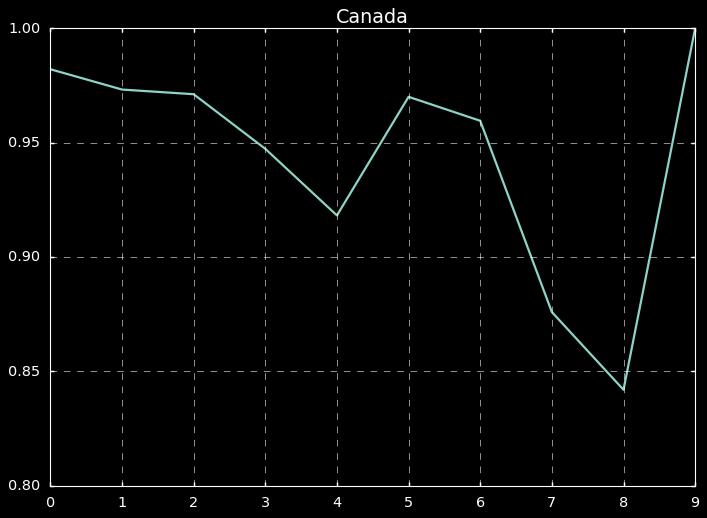

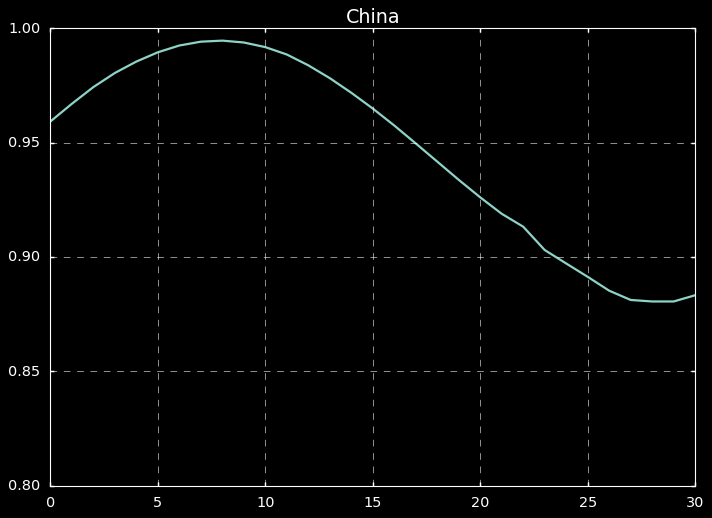

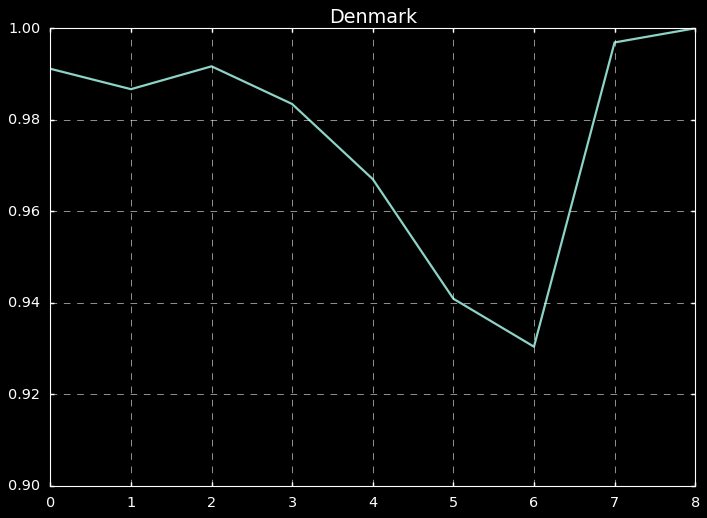

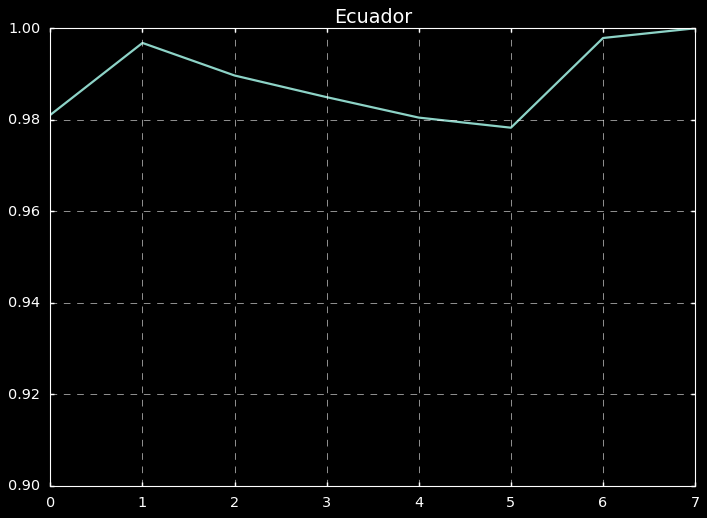

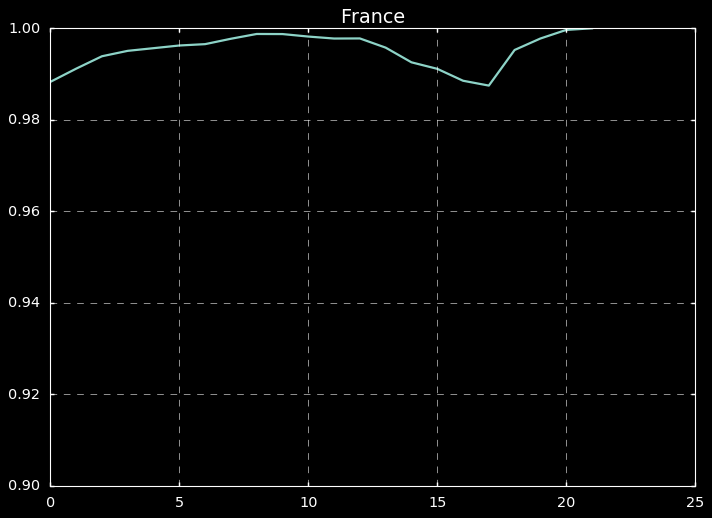

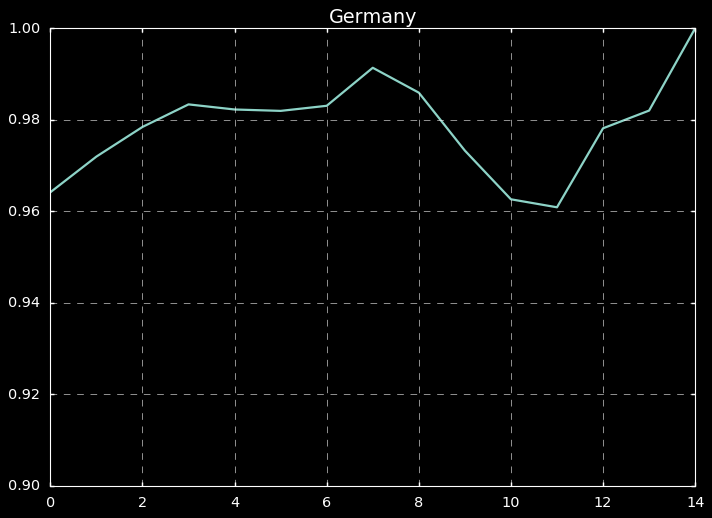

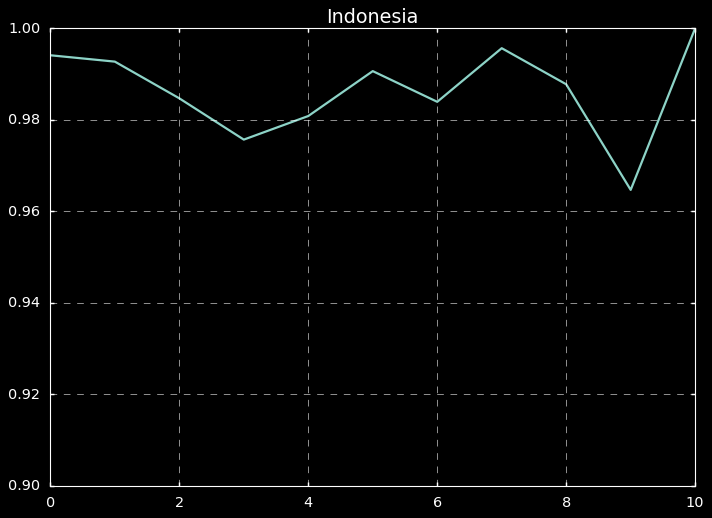

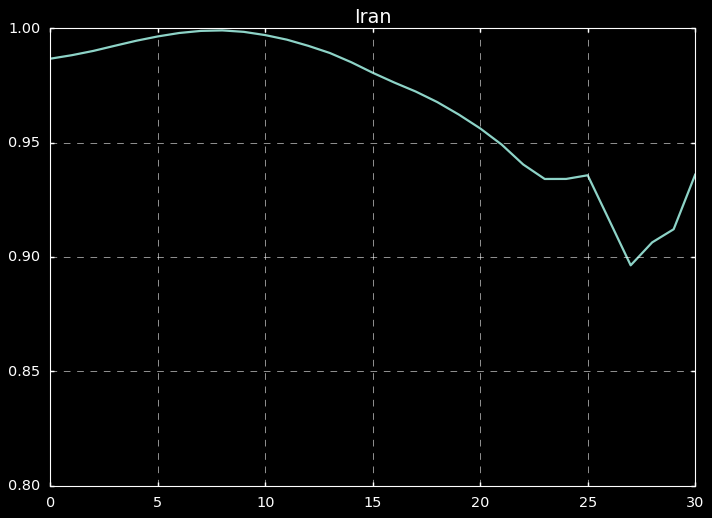

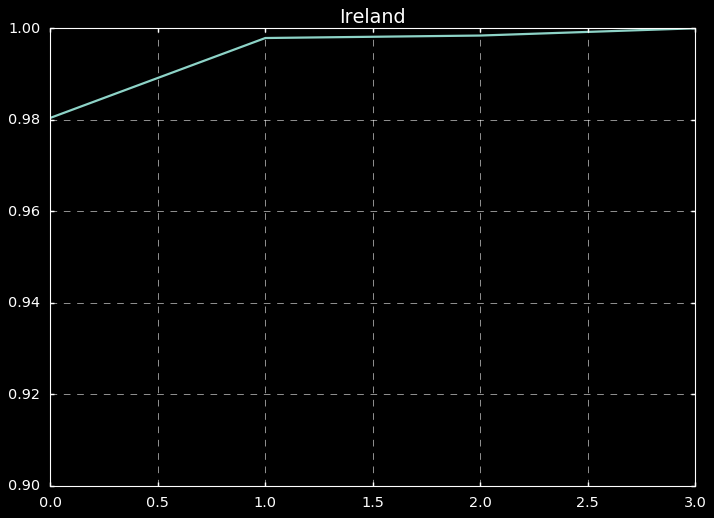

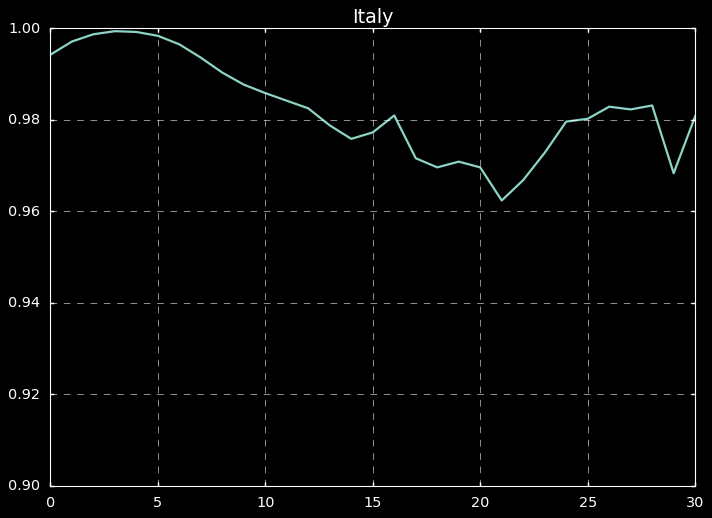

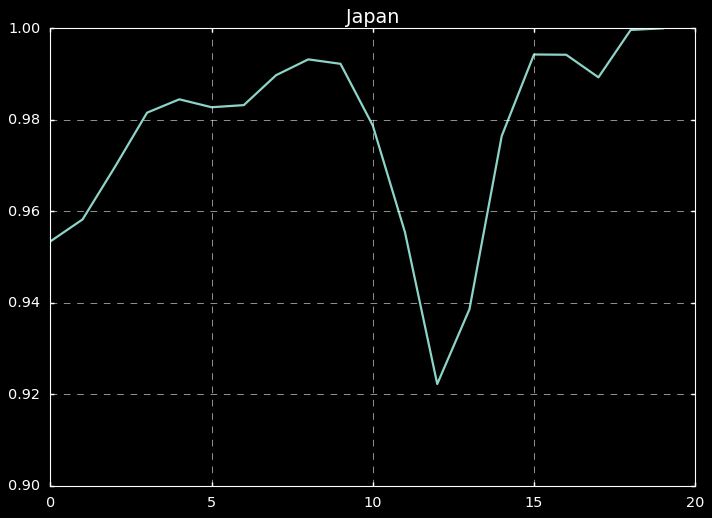

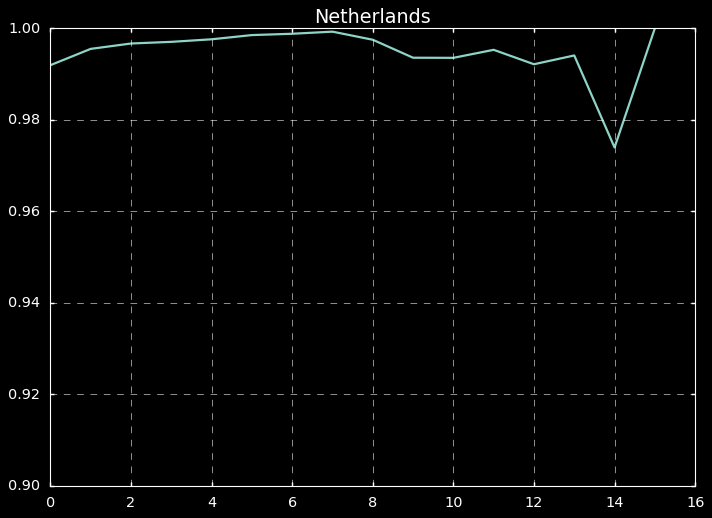

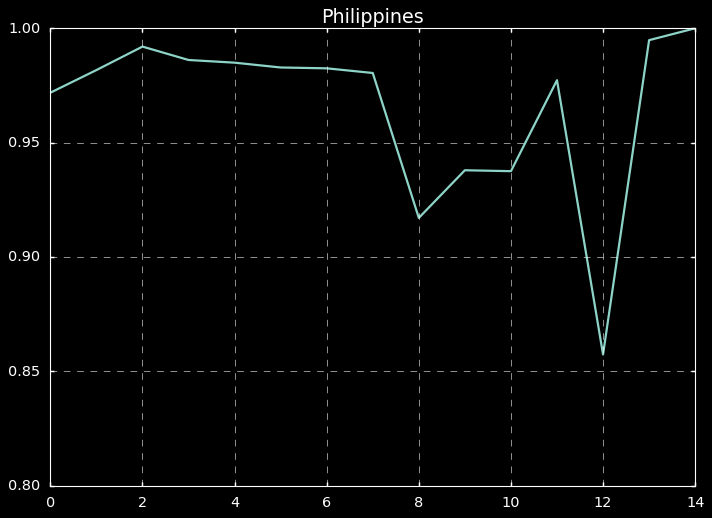

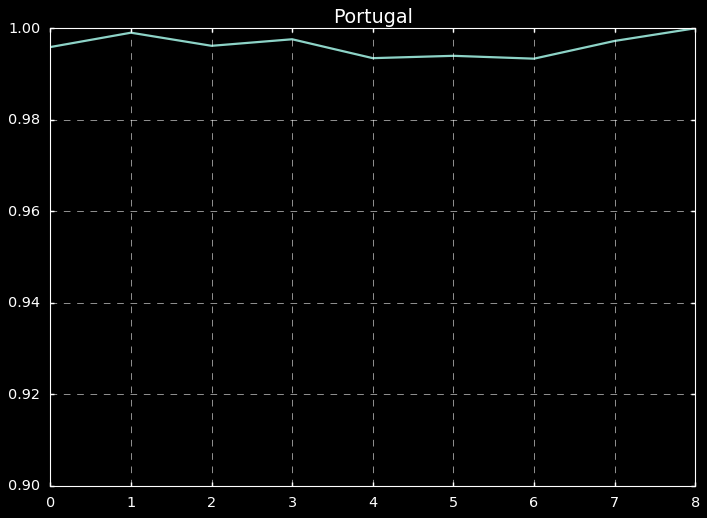

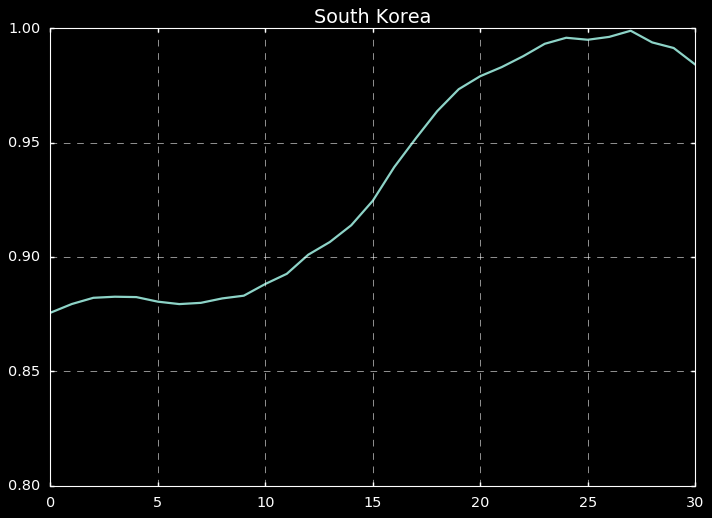

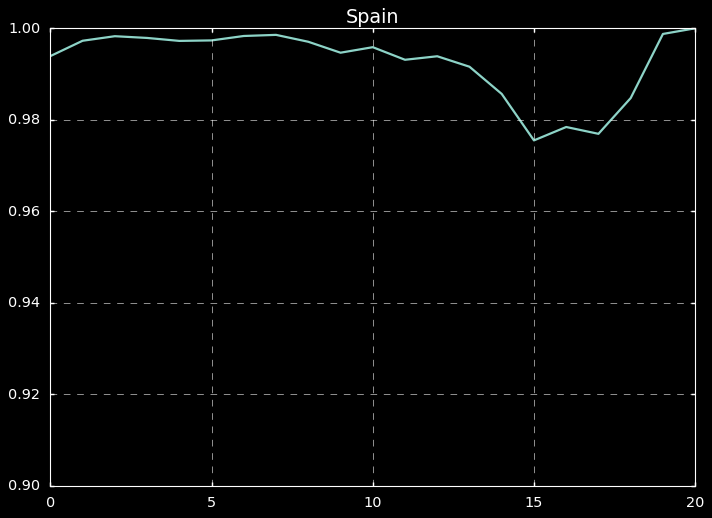

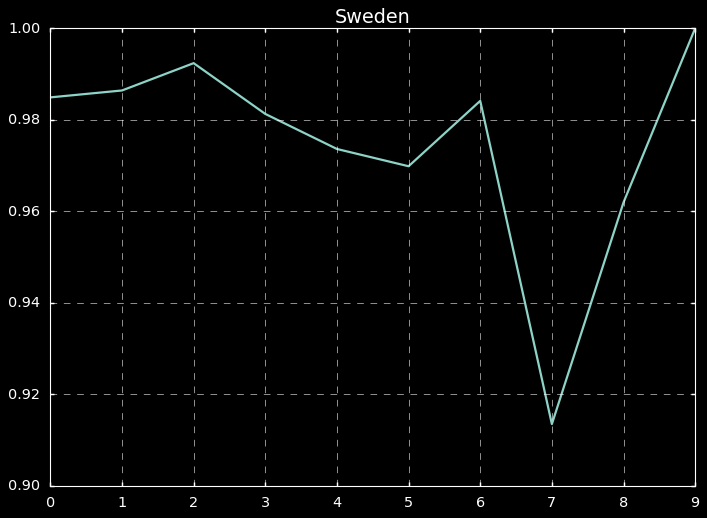

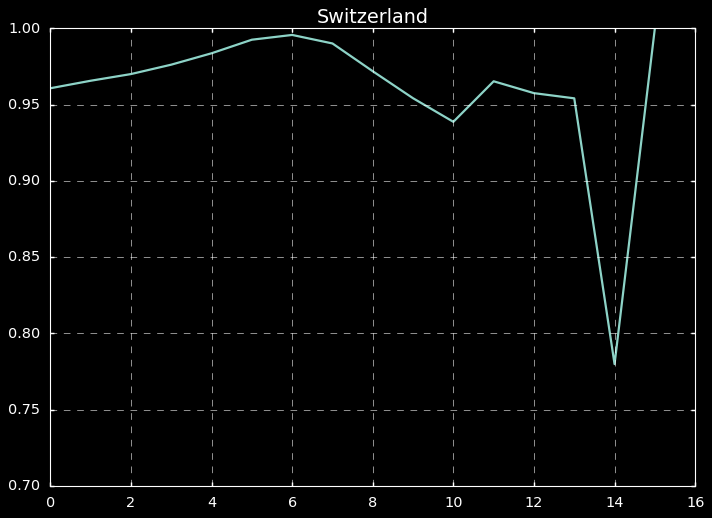

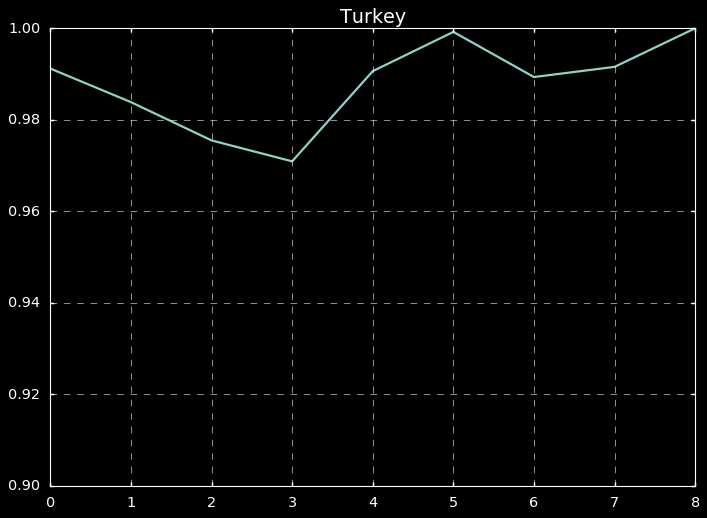

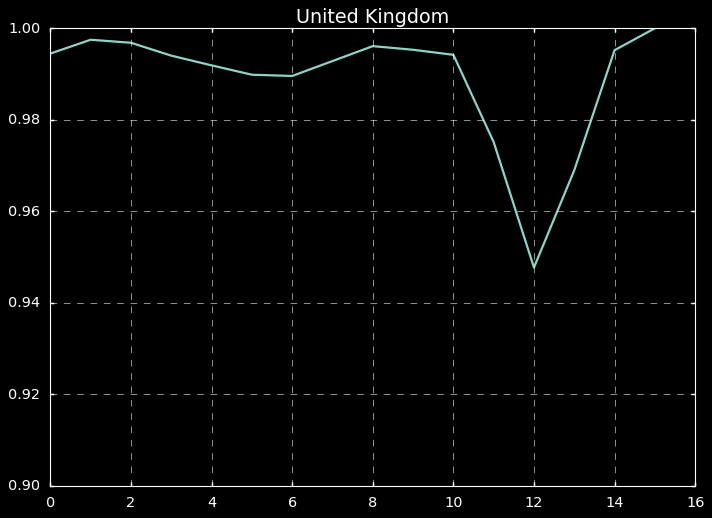

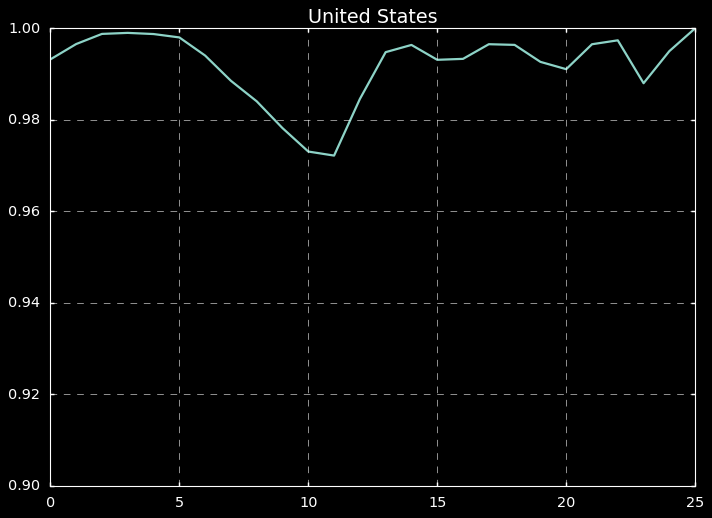

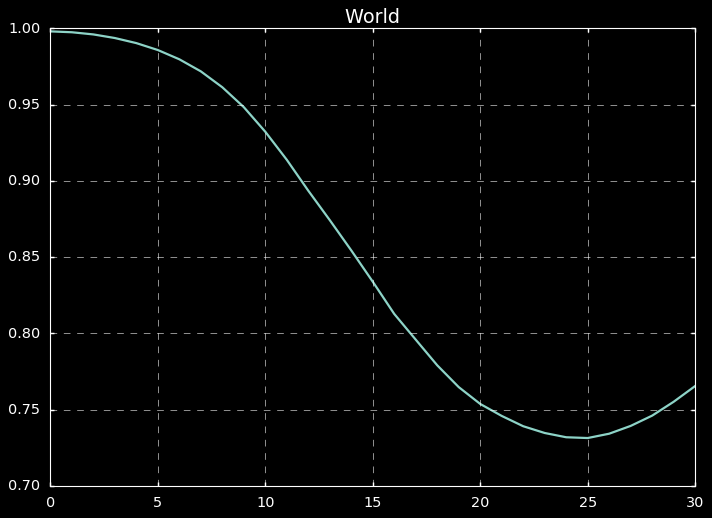

In [856]:
country_list = data_recent[data_recent.total_deaths>50].location
for country in country_list:
    x = data[data.location==country]['total_deaths'].values
    y = data[data.location==country]['total_cases'].values
    ind = x>10
    x=x[ind]
    y=y[ind]
    c=xcorr(x,y,30)
    ymin , ymax = np.floor(c.min()/.1)*.1, np.ceil(c.max()/.1)*.1
    plt.figure()
    plt.plot(c)
    plt.ylim((ymin,ymax))
    plt.title(country)
#     print(f'{country[:20]:25}{np.argmax(c):7d}{c.max():10.2f}')

Austria                        7      1.00
Belgium                       11      1.00
Brazil                         9      1.00
Canada                         9      1.00
China                          8      0.99
Denmark                        8      1.00
Ecuador                        7      1.00
France                        21      1.00
Germany                       14      1.00
Indonesia                     10      1.00
Iran                           8      1.00
Ireland                        3      1.00
Italy                          3      1.00
Japan                         19      1.00
Netherlands                   15      1.00
Philippines                   14      1.00
Portugal                       8      1.00
South Korea                   27      1.00
Spain                         20      1.00
Sweden                         9      1.00
Switzerland                   15      1.00
Turkey                         8      1.00
United Kingdom                15      1.00
United Stat

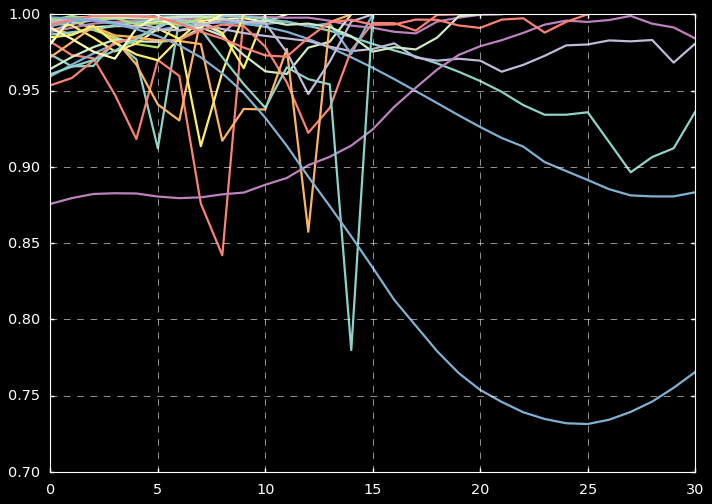

In [850]:
country_list = data_recent[data_recent.total_deaths>50].location
for country in country_list:
    x = data[data.location==country]['total_deaths'].values
    y = data[data.location==country]['total_cases'].values
    ind = x>10
    x=x[ind]
    y=y[ind]
    c=xcorr(x,y,30)
    plt.plot(c)
    print(f'{country[:20]:25}{np.argmax(c):7d}{c.max():10.2f}')


C:\Users\Pooya\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2966: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


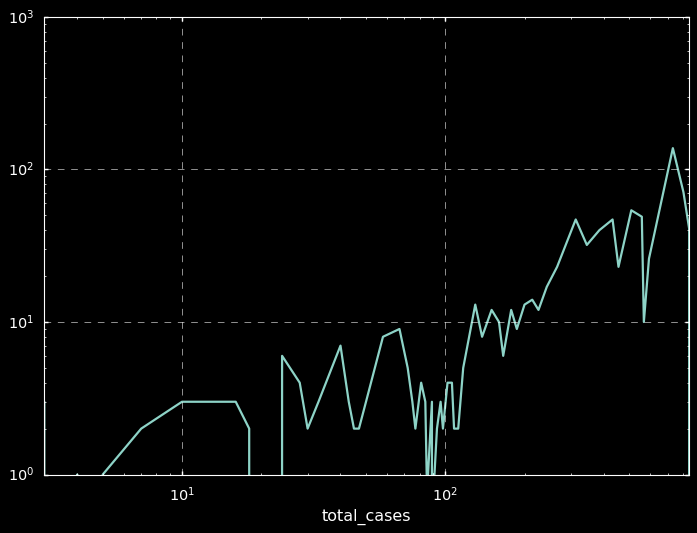

In [860]:
data[data.location=='Singapore'].plot('total_cases','new_cases',legend=None,loglog=True)

Text(0,0.5,'')

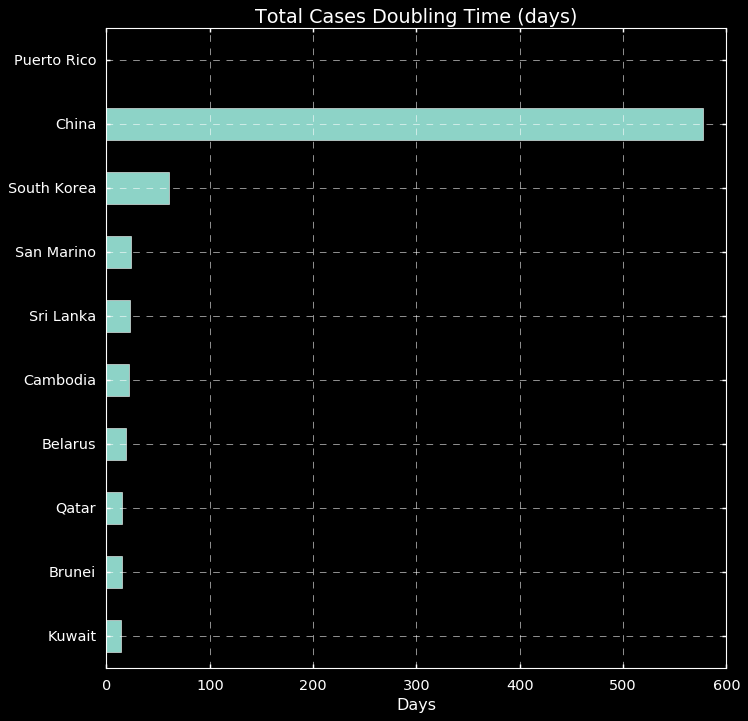

In [861]:
data_recent[data_recent.total_cases>100].sort_values(by = 'cases_doubling')[-10:].plot('location','cases_doubling',
                                                                           kind = 'barh',
                                                                          figsize = (10,10),
                                                                          grid = True,legend=None,
                                                                          title = 'Total Cases Doubling Time (days)');
plt.xlabel('Days')
plt.ylabel('')

Text(0,0.5,'')

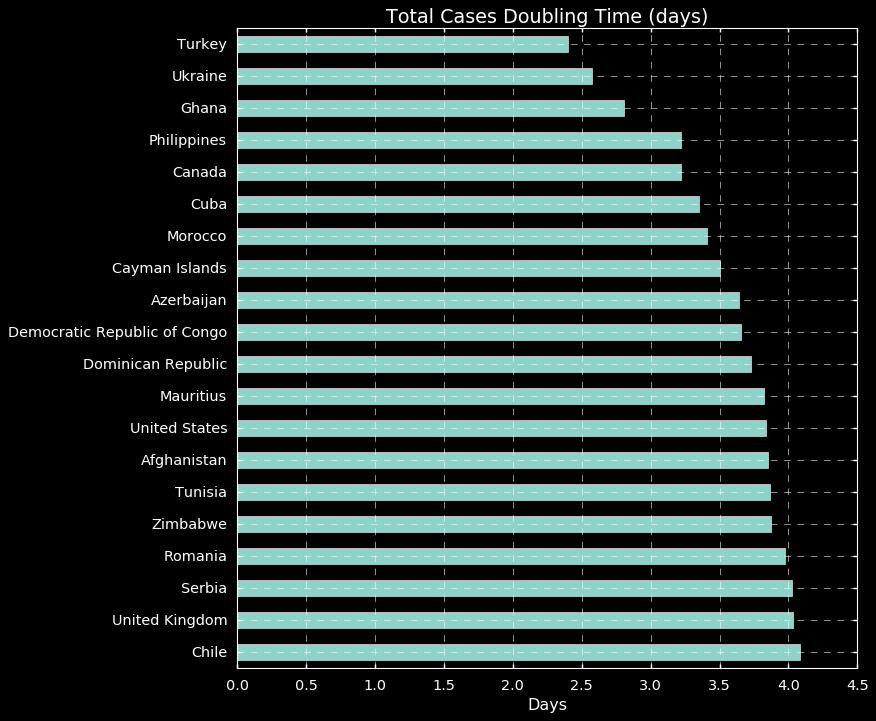

In [864]:
data_recent[data_recent.deaths_doubling>0].sort_values(by = 'cases_doubling',ascending = False)[-20:].plot('location','cases_doubling',
                                                                           kind = 'barh',
                                                                          figsize = (10,10),
                                                                          legend=None,
                                                                          grid = True,
                                                                          title = 'Total Cases Doubling Time (days)');
plt.xlabel('Days')
plt.ylabel('')

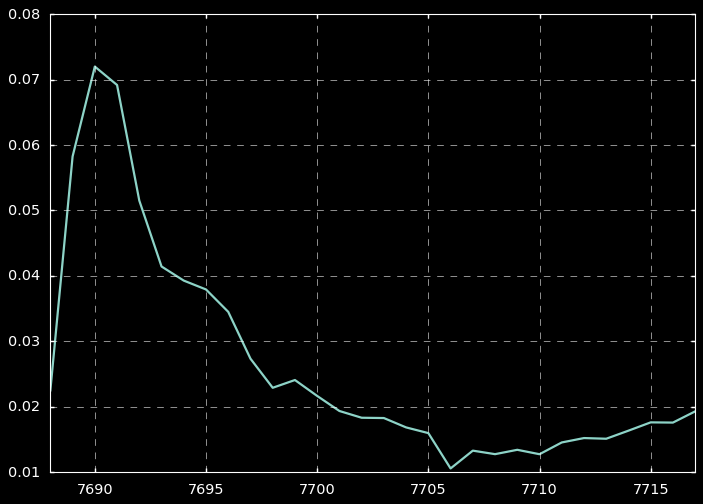

In [744]:
data[data.location=='United States'].death_rate[-30:].plot(logy=False)

In [745]:
countries = [c for c in data.location.unique() if c!='World']

In [746]:
growth100 = {}
n_start = 100
for country in countries:
    cases = data[data.location == country].total_cases.values
    idx = np.argmin(np.abs(cases-n_start))
    cases_from100 = cases[idx:]
    growth100.update({country:cases_from100})

(0, 40)

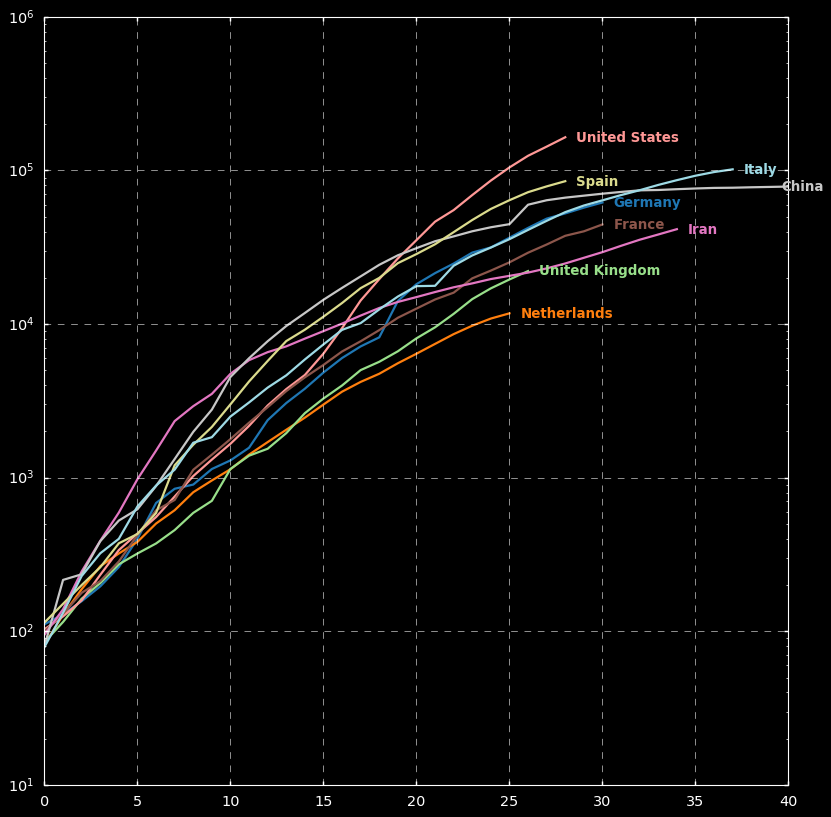

In [747]:
xmax = 40

top_countries_cases = data[data.date == latest_day].sort_values(by = 'total_cases')[-15:-1].location


countries_list = top_countries_deaths
plt.figure(figsize=(12,12))
cmap = plt.cm.get_cmap('tab20', len(countries_list))
for i,country in enumerate(countries_list):
    y = growth100[country]
    color = cmap(i)
    if len(y)>xmax:
        xloc = xmax
    else:
        xloc = len(y)
    plt.semilogy(y,c=color)
    plt.annotate(s=country,xy = (xloc-1,y[xloc-1]),color = color,weight = 'bold', xytext=(10,0),textcoords='offset points', va='center')
#     plt.annotate(xy=(x[-1],y[-1]), xytext=(5,0), textcoords='offset points', text=l, va='center')
# plt.legend(countries_list)
plt.xlim((0,xmax))

In [748]:
death20 = {}
n_start = 20
for country in countries:
    deaths = data[data.location == country].total_deaths.values
    idx = np.argmin(np.abs(deaths-n_start))
    deaths_from20 = deaths[idx:]
    death20.update({country:deaths_from20})

(0, 30)

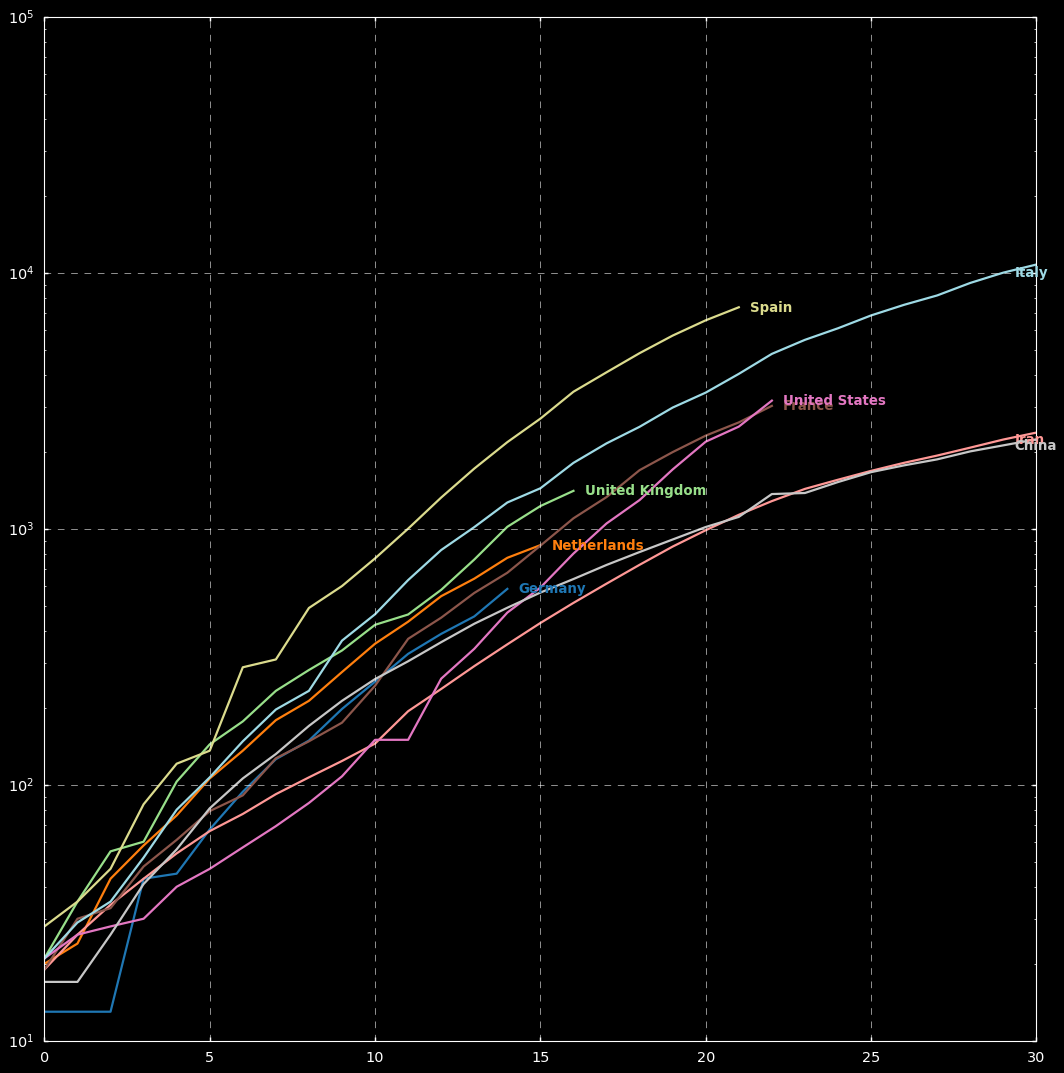

In [749]:
xmax = 30

top_countries_cases = data[data.date == latest_day].sort_values(by = 'total_cases')[-10:-1].location
top_countries_deaths = data[data.date == latest_day].sort_values(by = 'total_deaths')[-10:-1].location

cmap = plt.cm.get_cmap('tab20', len(countries_list))
countries_list = top_countries_deaths
plt.figure(figsize=(16,16))
for i,country in enumerate(countries_list):
    y = death20[country]
    color = cmap(i)
    if len(y)>xmax:
        xloc = xmax
    else:
        xloc = len(y)
    plt.semilogy(y,color = color)
    plt.annotate(s=country,xy = (xloc-1,y[xloc-1]),color = color,weight = 'bold',
                 xytext=(10,0),textcoords='offset points', va='center')
#     plt.annotate(xy=(x[-1],y[-1]), xytext=(5,0), textcoords='offset points', text=l, va='center')
# plt.legend(countries_list)
plt.xlim((0,xmax))


# Exponential Growth

In [750]:
m = linear_model.LinearRegression()
ndays = 7
eps = 1e-4
print(f'{"Country":26}{"sgr_cases":12}{"sgr_deaths":12}{"t_doubling":12}{"t_doubling":12}{"R^2":12}')
for country in countries:
#     print(country,)
    cases = data[data.location==country]['total_cases'].values[-ndays:]
    deaths = data[data.location==country]['total_deaths'].values[-ndays:]
    x = np.arange(ndays)[:,None]
    if (not len(x)==len(cases)) or cases.min()==0 or cases[-1]<20:
        continue
#     print(x.shape,cases.shape)
    m.fit(x,np.log(cases))
    sr_cases = m.coef_[0]
    dt_cases = np.log(2)/(sr_cases+eps)
    score = m.score(x,np.log(cases))
    if deaths.min()==0:
        sr_deaths = np.nan
        dt_deaths = np.nan
    else:
        m.fit(x,np.log(deaths))
        sr_deaths = m.coef_[0]
        dt_deaths = np.log(2)/(sr_deaths+eps)
    print(f'{country[:20]:20}{sr_cases:12.4f}{sr_deaths:12.4f}{dt_cases:12.4f}{dt_deaths:12.4f}{score:12.4f}')
    

Country                   sgr_cases   sgr_deaths  t_doubling  t_doubling  R^2         
Afghanistan               0.1720      0.2868      4.0270      2.4161      0.8992
Albania                   0.0948      0.1616      7.3021      4.2878      0.9336
Algeria                   0.1343      0.1101      5.1585      6.2873      0.9695
Andorra                   0.1396         nan      4.9617         nan      0.9854
Argentina                 0.1414      0.2304      4.8969      3.0072      0.9691
Armenia                   0.1003         nan      6.9048         nan      0.9768
Aruba                     0.2024         nan      3.4230         nan      0.9081
Australia                 0.1014      0.1221      6.8273      5.6728      0.9906
Austria                   0.0989      0.2131      7.0001      3.2510      0.9709
Azerbaijan                0.1946      0.2083      3.5592      3.3258      0.9795
Bahrain                   0.0436      0.0514     15.8750     13.4665      0.9397
Bangladesh            

Slovenia                  0.0792      0.2325      8.7368      2.9805      0.9858
South Africa              0.1440         nan      4.8116         nan      0.8819
South Korea               0.0115      0.0442     59.8836     15.6592      0.9962
Spain                     0.1269      0.1650      5.4599      4.1985      0.9772
Sri Lanka                 0.0319         nan     21.6394         nan      0.9133
Sweden                    0.0964      0.2343      7.1816      2.9568      0.9964
Switzerland               0.0950      0.2109      7.2894      3.2853      0.9950
Taiwan                    0.0603      0.1636     11.4723      4.2336      0.9749
Thailand                  0.0846      0.1447      8.1853      4.7883      0.9437
Togo                      0.0926         nan      7.4752         nan      0.9460
Trinidad and Tobago       0.0662         nan     10.4569         nan      0.9826
Tunisia                   0.1515      0.1452      4.5736      4.7714      0.9283
Turkey                    0.

# Logistic Growth Approximation

In [751]:
def logistic_growth(x,P0,r,Pmax):
    return np.log(Pmax/(1+(Pmax-P0)/P0*sp.exp(-r*x)))

def exponential_growth(x,P0,r):
    return np.log(P0*sp.exp(r*x))


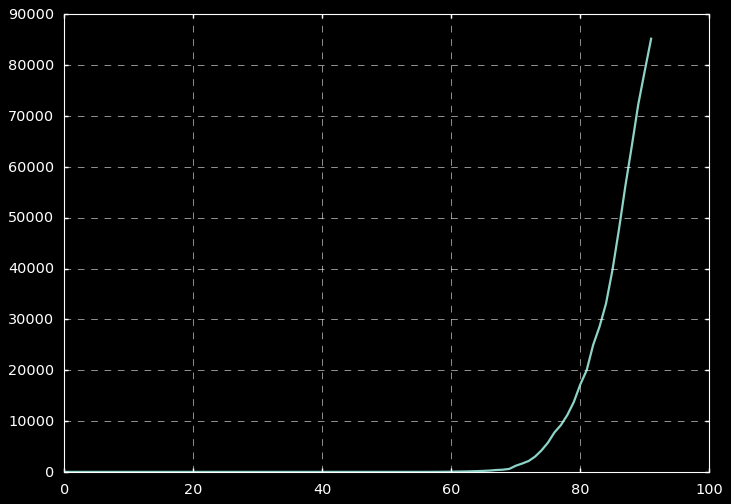

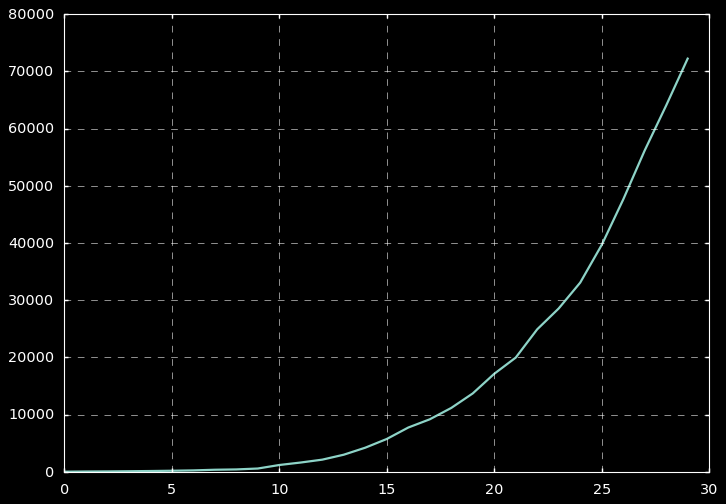

In [756]:

start = 60
end = 90
country = 'Spain'
plt.plot(data[data.location==country].total_cases.values)
plt.figure()
plt.plot(data[data.location==country].total_cases.values[start:end])


growth rate: 0.32
Max Cases: 66013
R-sqr: 0.9966


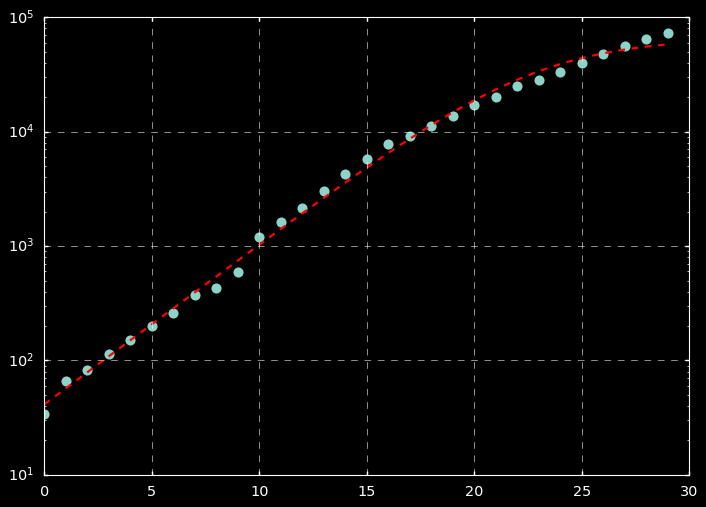

In [757]:
y = np.log(data[data.location==country].total_cases.values[start:end])
x = np.arange(len(y))
# result1=fit_curve(exponential_growth,x,y,[y[0],1])
# result2=fit_curve(logistic_growth,x,y,[y[0],1,y[-1]])
result2 = optimize.curve_fit(logistic_growth,x,y,[100,.25,1e5])
# print(result1)
print(f'growth rate: {result2[0][1]:.2f}')
print(f'Max Cases: {result2[0][2]:.0f}')
preds = logistic_growth(x,result2[0][0],result2[0][1],result2[0][2])
print(f'R-sqr: {r2_score(y,preds):.4f}')
plt.semilogy(x,np.exp(y),'o');
plt.semilogy(x,np.exp(preds),'--',color='red');
# plt.figure()
# plt.scatter(y,preds)
